In [108]:
%run helper.ipynb
%matplotlib widget
%jsroot on

a = Ana("waveShapeMcp", "run530167")
p = Par(a.runName)
c = Canva()


 Beginning new ROOT session with private TStyle 


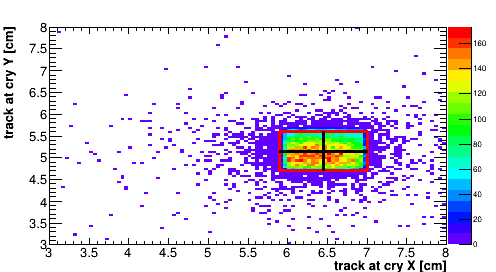

In [7]:
tre.Draw(F"cryPos[1]:cryPos[0]>>hh(100, 3, 8, 100, 3, 8)",  cCutSipm , "goff")
hh = gDirectory.Get("hh")
_, cc = NewCanvas(500,300)
cc.SetLogz(0)
hh.SetStats(0)
hh.SetTitle(run)
hh.GetXaxis().SetTitle("track at cry X [cm]")
hh.GetYaxis().SetTitle("track at cry Y [cm]")
box = TBox(fidlarge[0], fidlarge[2], fidlarge[1], fidlarge[3])
box.SetLineColor(kRed)
box.SetLineWidth(3)
box.SetFillStyle(0)
l1, l2 = TLine(fidMidX, fidlarge[2], fidMidX, fidlarge[3]), TLine(fidlarge[0], fidMidY, fidlarge[1], fidMidY)
l1.SetLineWidth(3)
l2.SetLineWidth(3)
# l1.SetLineColor(kRed)
# l2.SetLineColor(kRed)
hh.Draw("zcol")
box.Draw("same")
l1.Draw("same")
l2.Draw("same")

9136

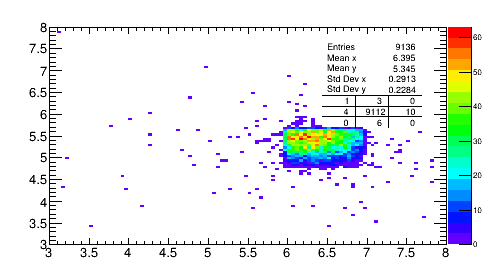

In [8]:
_, cc = NewCanvas(500,300)
tre.Draw(F"cryPos[1]:cryPos[0]>>hh(100, 3, 8, 100, 3, 8)",  cCutSipm + " && peak[2]>400 && peak[3]>400" , "zcol")

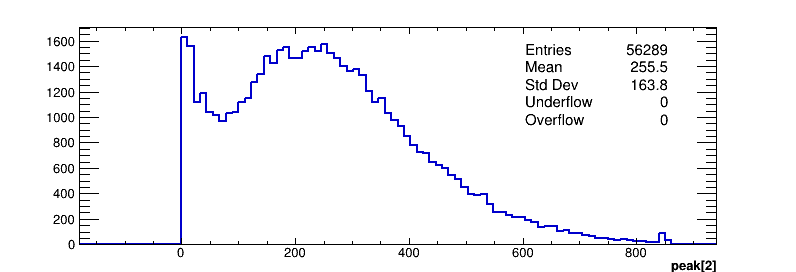

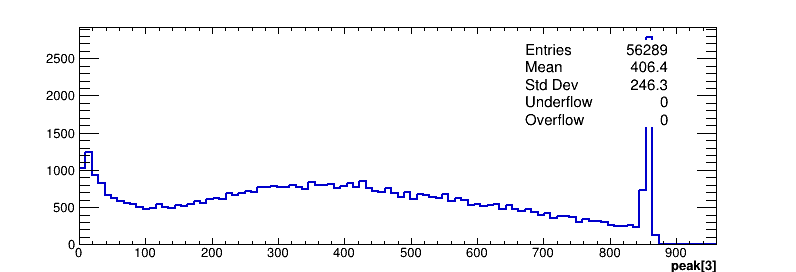

In [9]:
NewCanvas(800,300)
tre.Draw(F"peak[2]")
NewCanvas(800,300)
tre.Draw(F"peak[3]")

 FCN=1295.67 FROM MIGRAD    STATUS=CONVERGED      72 CALLS          73 TOTAL
                     EDM=7.53059e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.99959e+02   4.62494e+00   6.31474e-02   5.23758e-05
   2  Mean        -5.03599e-01   2.49314e-04   3.90830e-06  -1.28080e+00
   3  Sigma        4.33014e-02   1.80346e-04   1.66039e-05   1.47557e-01


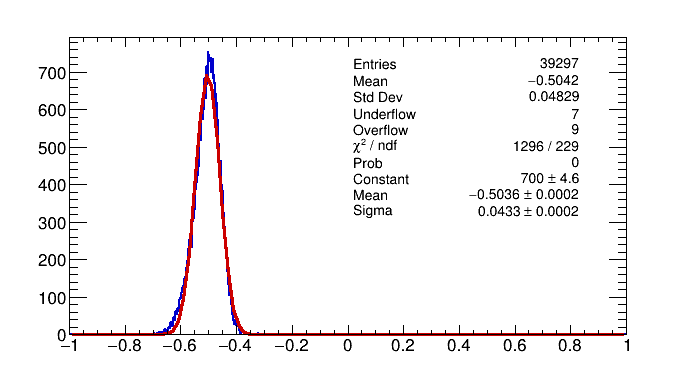

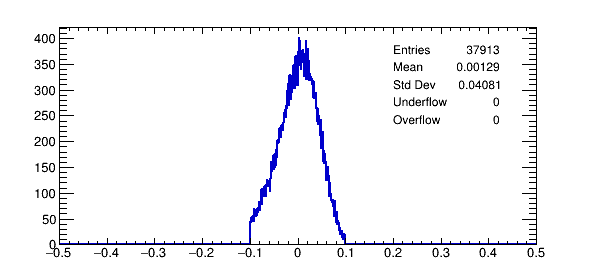

In [10]:
NewCanvas(700,400)
cutMcpPeak = "peak[2] > 100 && peak[2] < 800 && peak[3] > 100 && peak[3] < 800"
tre.Draw(F"{dtMcp}>>hh(1000,-1,1)", F"{cutMcpPeak}")
hh = gDirectory.Get("hh")
fgaus = TF1("fgaus", "gaus")
hh.Fit(fgaus, "S")

cutMcpDt = F"abs(tim[2]-tim[3]-{fgaus.GetParameter(1)}) < 0.1"

NewCanvas(600,300)
tre.Draw(F"{dtMcp}-{fgaus.GetParameter(1)}>>hhh(1000,-0.5,0.5)", F"{cutMcpPeak} && {cutMcpDt}")

cutMcp = cutMcpPeak + cutAnd + cutMcpDt

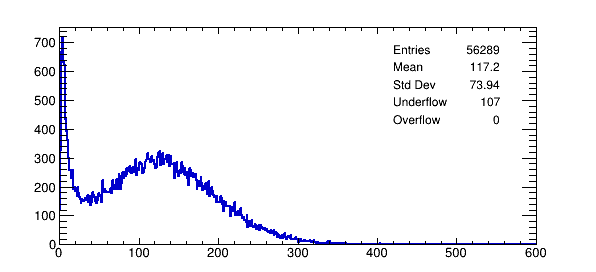

In [11]:
_, cc = NewCanvas(600,300)
tre.Draw("charge[0]>>(600,0,600)")

In [12]:
qmin, qmax = 100, 180 
qCut = F"charge[0] > {qmin} && charge[1] > {qmin} && charge[0] < {qmax} && charge[1] < {qmax}"
qminq, qmax1 = 150, 200 
qCutCharge = F"charge[0] > {qmin} && charge[1] > {qmin} && charge[0] < {qmax} && charge[1] < {qmax}"

histoTime = "(400, 6, 8)"
histoQ = "(200,0.4,0.6)"
histoQm = "(200,-0.2,0.2)"

In [13]:
times1, times2, timesm = [],[],[]
q1, q2, qm = [],[],[]

for i in tqdm(range(4)):

    thisCut = qCut + cutAnd + fidQuadrants[i] + cutAnd + cutMcp

    tre.Draw(F"tim[0]-{mtMcp}>>hhh{histoTime}", thisCut, "zcol")
    times1.append(gDirectory.Get("hhh").Clone())
    tre.Draw(F"tim[1]-{mtMcp}>>hhh{histoTime}", thisCut, "zcol")
    times2.append(gDirectory.Get("hhh").Clone())
    tre.Draw(F"{mtSipm}-{mtMcp}>>hhh{histoTime}", thisCut, "zcol")
    timesm.append(gDirectory.Get("hhh").Clone())

    tre.Draw(F"0.5*charge[0]/{mcSipm}>>hhh{histoQ}", qCutCharge + cutAnd + fidQuadrants[i], "zcol")
    q1.append(gDirectory.Get("hhh").Clone())
    tre.Draw(F"0.5*charge[1]/{mcSipm}>>hhh{histoQ}", qCutCharge + cutAnd + fidQuadrants[i], "zcol")
    q2.append(gDirectory.Get("hhh").Clone())
    tre.Draw(F"{asymSipm}>>hhh{histoQm}", qCutCharge + cutAnd + fidQuadrants[i], "zcol")
    qm.append(gDirectory.Get("hhh").Clone())

100%|██████████| 4/4 [00:01<00:00,  3.79it/s]
Warning in <TFile::Append>: Replacing existing TH1: hhh (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hhh (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hhh (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hhh (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hhh (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hhh (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hhh (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hhh (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hhh (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hhh (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hhh (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hhh (Potent

Info in <TCanvas::Print>: pdf file out/run530167/waveshapemcp/tChanQuadrants.pdf has been created


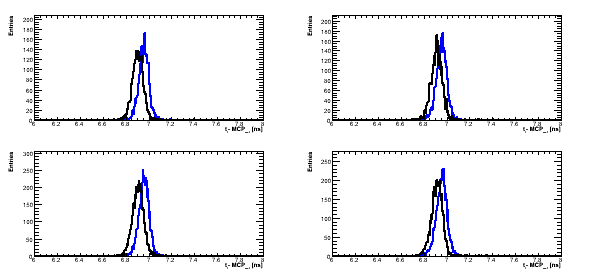

In [14]:
_, cc = NewCanvas(600,300)
cc.Divide(2,2)

for idx, (h1, h2) in enumerate(zip(times1, times2)):
    cc.cd(idx+1)
    cc.SetRightMargin(0.13)
    cc.SetLeftMargin(0.13)
    h1.SetStats(0)
    h1.GetXaxis().SetTitle("t_{i}- MCP_{mt} [ns]")
    h1.GetYaxis().SetTitle("Entries")
    h1.SetLineColor(kBlue)
    h1.GetYaxis().SetRangeUser(0,h1.GetMaximum()*1.2)
    h1.DrawClone()
    h2.SetLineColor(kBlack)
    h2.SetStats(0)
    h2.DrawClone("sames")

cc.SaveAs(out + "tChanQuadrants" + exten) 
# cc.SaveAs(out + "TimeSiPM1_MCP_PWO.pdf")

Info in <TCanvas::Print>: pdf file out/run530167/waveshapemcp/tMeanQuadrants.pdf has been created


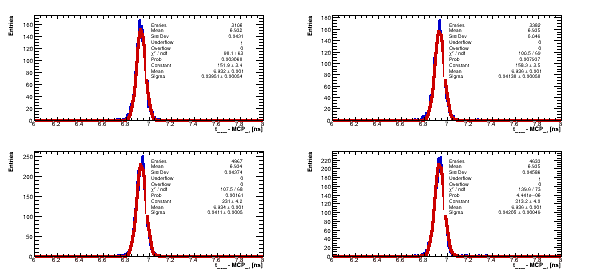

In [15]:
_, cc = NewCanvas(600,300)
cc.Divide(2,2)

for idx, hh in enumerate(timesm):
    cc.cd(idx+1)
    cc.SetRightMargin(0.13)
    cc.SetLeftMargin(0.13)
    hh.SetStats(1)
    hh.GetXaxis().SetTitle("t_{mean}- MCP_{mt} [ns]")
    hh.GetYaxis().SetTitle("Entries")
    hh.Fit("gaus", "EMQ", "")
    hh.DrawClone()

cc.SaveAs(out + "tMeanQuadrants" + exten) 
# cc.SaveAs(out + "TimeSiPM1_MCP_PWO.pdf")

Info in <TCanvas::Print>: pdf file out/run530167/waveshapemcp/q1Quad.pdf has been created


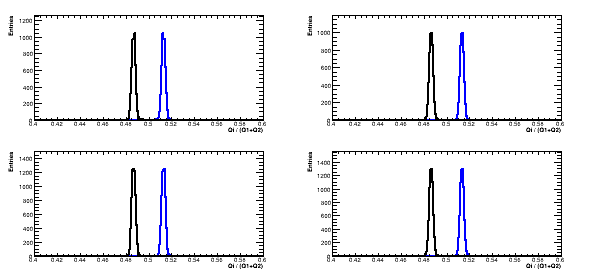

In [16]:
_, cc = NewCanvas(600,300)
cc.Divide(2,2)

for idx, (h1, h2) in enumerate(zip(q1, q2)):
    cc.cd(idx+1)
    cc.SetRightMargin(0.13)
    cc.SetLeftMargin(0.13)
    h1.SetStats(0)
    h1.GetXaxis().SetTitle("Qi / (Q1+Q2)")
    h1.GetYaxis().SetTitle("Entries")
    h1.SetLineColor(kBlue)
    h1.GetYaxis().SetRangeUser(0,h1.GetMaximum()*1.2)
    h1.DrawClone()
    h2.SetLineColor(kBlack)
    h2.SetStats(0)
    h2.DrawClone("sames")

cc.SaveAs(out + "q1Quad" + exten) 

Info in <TCanvas::Print>: pdf file out/run530167/waveshapemcp/mqQuad.pdf has been created


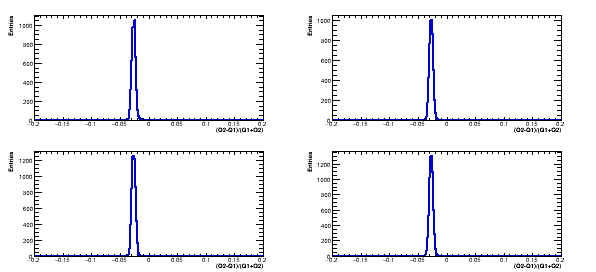

In [17]:
_, cc = NewCanvas(600,300)
cc.Divide(2,2)

for idx, hh in enumerate(qm):
    cc.cd(idx+1)
    cc.SetRightMargin(0.13)
    cc.SetLeftMargin(0.13)
    hh.SetStats(0)
    hh.GetXaxis().SetTitle("(Q2-Q1)/(Q1+Q2)")
    hh.GetYaxis().SetTitle("Entries")
    # hh.Fit("gaus", "EMQ", "")
    hh.DrawClone()

cc.SaveAs(out + "mqQuad" + exten) 